In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [344]:
data = pd.read_csv("F:\CSV\Bengaluru_House_Data.csv")
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [345]:
data.drop(columns=['area_type','availability','society','balcony','balcony','bath'],axis=1,inplace=True)

In [346]:
data.head(5)

,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00
3,Lingadheeranahalli,3 BHK,1521,95.00
4,Kothanur,2 BHK,1200,51.00


In [347]:
data.shape

(13320, 4)

In [348]:
data.dropna(inplace=True)
data.isnull().sum()

location      0
size          0
total_sqft    0
price         0
dtype: int64

In [349]:
data.duplicated().sum()

935

In [350]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [351]:
data.shape

(12368, 4)

In [352]:
data.head()

,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00
3,Lingadheeranahalli,3 BHK,1521,95.00
4,Kothanur,2 BHK,1200,51.00


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12368 entries, 0 to 13318
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12368 non-null  object 
 1   size        12368 non-null  object 
 2   total_sqft  12368 non-null  object 
 3   price       12368 non-null  float64
dtypes: float64(1), object(3)
memory usage: 483.1+ KB


In [354]:
data['BHK'] = data['size'].apply(lambda x : int(x.split(' ')[0]))

In [355]:
data.drop(['size'],axis=1,inplace=True)
data.head(5)

,location,total_sqft,price,BHK
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3
3,Lingadheeranahalli,1521,95.00,3
4,Kothanur,1200,51.00,2


In [356]:
data['total_sqft'].value_counts()

1200           769
1100           200
1500           197
2400           193
600            174
              ... 
5985             1
2493             1
2466 - 2856      1
3580             1
4689             1
Name: total_sqft, Length: 2110, dtype: int64

In [357]:
def convert(x):
    try:
        float(x)
    except:
        return False
    return True

In [358]:
data[~data['total_sqft'].apply(convert)]

,location,total_sqft,price,BHK
30,Yelahanka,2100 - 2850,186.000,4
56,Devanahalli,3010 - 3410,192.000,4
81,Hennur Road,2957 - 3450,224.500,4
122,Hebbal,3067 - 8156,477.000,4
137,8th Phase JP Nagar,1042 - 1105,54.005,2
...,...,...,...,...
12975,Whitefield,850 - 1060,38.190,2
12990,Talaghattapura,1804 - 2273,122.000,3
13059,Harlur,1200 - 1470,72.760,2
13240,Devanahalli,1020 - 1130,52.570,1


In [359]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None    

In [360]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]

In [361]:
data.isnull().sum()

location      0
total_sqft    0
price         0
BHK           0
dtype: int64

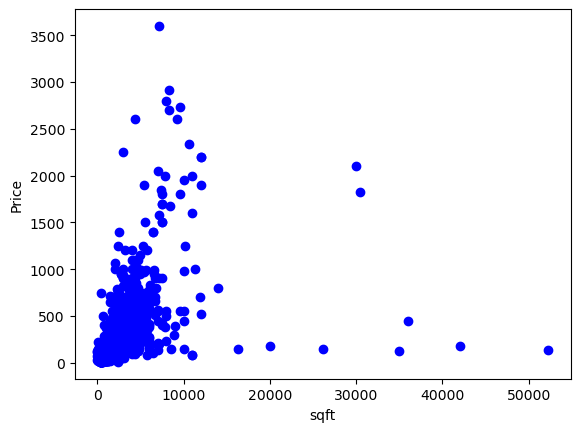

In [362]:
import matplotlib.pyplot as plt
plt.scatter(data['total_sqft'],data['price'],color='blue')
plt.xlabel('sqft')
plt.ylabel('Price')
plt.show()

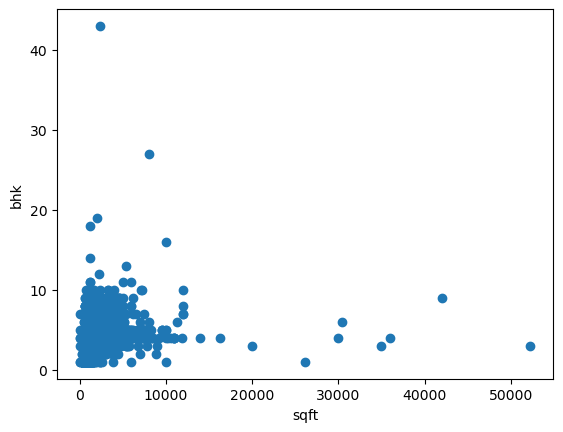

In [363]:
plt.scatter(data['total_sqft'],data['BHK'])
plt.xlabel('sqft')
plt.ylabel('bhk')
plt.show()

In [364]:
upper_limit = data['total_sqft'].mean() + 3*data['total_sqft'].std()
lower_limit = data['total_sqft'].mean() - 3*data['total_sqft'].std()
print(upper_limit,lower_limit)

5399.208993300425 -2249.191884876468


In [365]:
data[(data['total_sqft'] > upper_limit) | (data['total_sqft'] < lower_limit)]

,location,total_sqft,price,BHK
62,Whitefield,5700.0,650.0,4
122,Hebbal,5611.5,477.0,4
408,Rajaji Nagar,12000.0,2200.0,7
440,Whitefield,11890.0,700.0,4
514,Banashankari Stage III,8500.0,145.0,4
...,...,...,...,...
13095,Sathya Sai Layout,6652.0,660.0,4
13119,Sathya Sai Layout,6688.0,700.0,4
13197,Ramakrishnappa Layout,9200.0,2600.0,4
13200,Defence Colony,8000.0,2800.0,6


In [366]:
data['total_sqft'] = np.where(
    data['total_sqft']>upper_limit,upper_limit,
    np.where(data['total_sqft']<lower_limit,lower_limit,
    data['total_sqft']
    )
)
data.isnull().sum()

location      0
total_sqft    0
price         0
BHK           0
dtype: int64

In [367]:
upper_limit2 = data['price'].mean() + 3*data['price'].std()
lower_limit2 = data['price'].mean() - 3*data['price'].std()
print(upper_limit2,lower_limit2)

575.3831128979274 -344.7806254770541


In [368]:
data[(data['price'] > upper_limit2) | (data['price'] < lower_limit2)]

,location,total_sqft,price,BHK
7,Rajaji Nagar,3300.000000,600.0,4
62,Whitefield,5399.208993,650.0,4
159,Mahalakshmi Layout,3750.000000,760.0,4
408,Rajaji Nagar,5399.208993,2200.0,7
440,Whitefield,5399.208993,700.0,4
...,...,...,...,...
13086,Sindhi Colony,5399.208993,988.0,5
13095,Sathya Sai Layout,5399.208993,660.0,4
13119,Sathya Sai Layout,5399.208993,700.0,4
13197,Ramakrishnappa Layout,5399.208993,2600.0,4


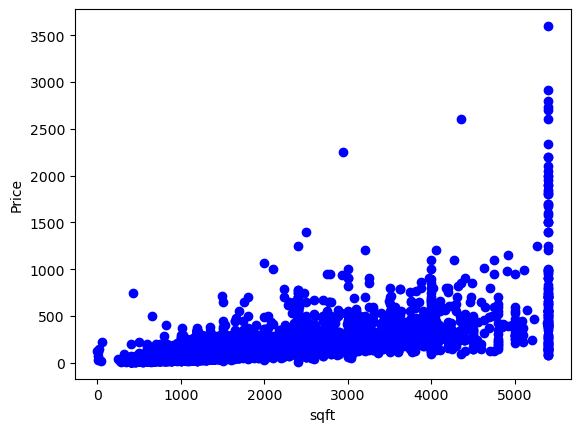

In [369]:
import matplotlib.pyplot as plt
plt.scatter(data['total_sqft'],data['price'],color='blue')
plt.xlabel('sqft')
plt.ylabel('Price')
plt.show()

In [370]:
data['price'] = np.where(
    data['price']>upper_limit2,upper_limit2,
    np.where(data['price']<lower_limit2,lower_limit2,
    data['price']
    )
)

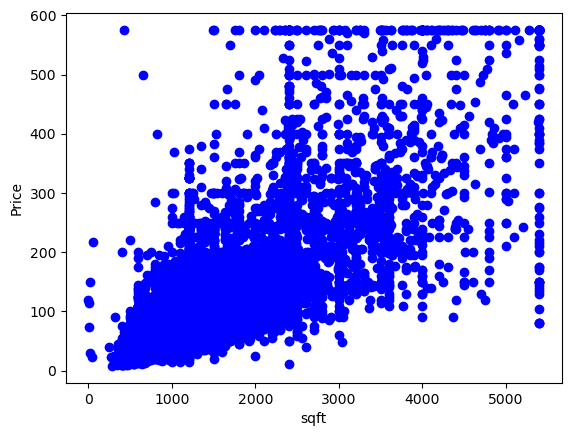

In [371]:
import matplotlib.pyplot as plt
plt.scatter(data['total_sqft'],data['price'],color='blue')
plt.xlabel('sqft')
plt.ylabel('Price')
plt.show()

In [372]:
data['price'].describe()

count    12322.000000
mean       109.016783
std        102.554874
min          8.000000
25%         50.000000
50%         73.500000
75%        124.000000
max        575.383113
Name: price, dtype: float64

In [373]:
data.head(4)

,location,total_sqft,price,BHK
0,Electronic City Phase II,1056.0,39.07,2
1,Chikka Tirupathi,2600.0,120.00,4
2,Uttarahalli,1440.0,62.00,3
3,Lingadheeranahalli,1521.0,95.00,3


In [374]:
data['location'].value_counts()

Whitefield               503
Sarjapur  Road           358
Electronic City          272
Thanisandra              223
Kanakpura Road           214
                        ... 
Maruthi Extension          1
Okalipura                  1
Old Town                   1
Vasantapura main road      1
Abshot Layout              1
Name: location, Length: 1298, dtype: int64

In [375]:
data.location = data.location.apply(lambda x: x.strip())
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [376]:
location_stas_less_than_100 = location_stats[location_stats < 100]
location_stas_less_than_100

location
Bellandur                   93
KR Puram                    91
Electronics City Phase 1    88
Hoodi                       88
Yeshwanthpur                83
                            ..
1 Giri Nagar                 1
Kanakapura Road,             1
Kanakapura main  Road        1
Kannur                       1
whitefiled                   1
Name: location, Length: 1272, dtype: int64

In [377]:
data.location = data.location.apply(lambda x : 'other' if x in location_stas_less_than_100 else x)
data.location.value_counts()

other                       9315
Whitefield                   504
Sarjapur  Road               358
Electronic City              274
Thanisandra                  225
Kanakpura Road               214
Yelahanka                    207
Marathahalli                 164
Raja Rajeshwari Nagar        153
Bannerghatta Road            148
Uttarahalli                  143
Hebbal                       141
Hennur Road                  140
7th Phase JP Nagar           124
Electronic City Phase II     106
Rajaji Nagar                 106
Name: location, dtype: int64

In [378]:
data['location'].value_counts()

other                       9315
Whitefield                   504
Sarjapur  Road               358
Electronic City              274
Thanisandra                  225
Kanakpura Road               214
Yelahanka                    207
Marathahalli                 164
Raja Rajeshwari Nagar        153
Bannerghatta Road            148
Uttarahalli                  143
Hebbal                       141
Hennur Road                  140
7th Phase JP Nagar           124
Electronic City Phase II     106
Rajaji Nagar                 106
Name: location, dtype: int64

In [379]:
dummies = pd.get_dummies(data.location)
dummies.head(3)

,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [380]:
new_data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
new_data.head()

,location,total_sqft,price,BHK,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,Electronic City Phase II,1056.0,39.07,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,other,2600.0,120.00,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,62.00,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,other,1521.0,95.00,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,other,1200.0,51.00,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [381]:
new_data = new_data.drop('location',axis = 'columns')
new_data.head(10)

,total_sqft,price,BHK,7th Phase JP Nagar,Bannerghatta Road,Electronic City,Electronic City Phase II,Hebbal,Hennur Road,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka
0,1056.0,39.070000,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2600.0,120.000000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1440.0,62.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1521.0,95.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1200.0,51.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1170.0,38.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,2732.0,204.000000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3300.0,575.383113,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,1310.0,63.250000,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,1020.0,370.000000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [382]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [383]:
X_train,X_test,y_train,y_test =train_test_split(new_data.drop(['price'],axis=1),new_data['price'],test_size=0.2)

In [384]:
model.fit(X_train,y_train)

LinearRegression()

In [385]:
y_pred = model.predict(X_test)

In [386]:
mean_squared_error(y_test, y_pred)

3647.7558056394164

In [387]:
model.score(X_test,y_test)

0.6402660973958004